In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np

# **Load and Preprocess Data**

In [ ]:
URL = '/content/gdrive/My Drive/ICE477/text1.txt'
file = open(URL,'r',encoding='utf8')
lines = []
for line in file :
  lines.append(line)

data = ""
for i in lines:
  data = ''.join(lines)
# Replace unnecessary stuff with spaces
data = data.replace('\n',' ').replace('+',' ').replace('-',' ').replace('\ufeff',' ').replace('"',' ').replace('\r',' ').replace('|',' ').replace('*',' ')
# Remove unnecessary spaces
data = data.split()
data = ' '.join(data)
data[:1000]

"The Project Gutenberg EBook of My Reminiscences, by Rabindranath Tagore This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org Title: My Reminiscences Author: Rabindranath Tagore Illustrator: Sasi Kumar Hesh Release Date: August 2, 2007 [EBook #22217] Language: English START OF THIS PROJECT GUTENBERG EBOOK MY REMINISCENCES Produced by Juliet Sutherland and the Online Distributed Proofreading Team at https://www.pgdp.net Transcriber's Note: Obvious typographical errors have been corrected in this text. For a complete list, please see the bottom of this document. Letters with macrons are represented as [=a]. [Illustration: RABINDRANATH TAGORE FROM THE PORTRAIT IN COLOURS BY SASI KUMAR HESH] MY REMINISCENCES BY SIR RABINDRANATH TAGORE WITH FRONTISPIECE FROM THE PORTRAIT IN COLORS BY SASI KUMAR HESH

In [ ]:
len(data)

357543

# **Apply Tokenization**

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
# Saving the tokenizer for predict function
Saved_Token_Path = '/content/gdrive/My Drive/ICE477/token1.pk1'
pickle.dump(tokenizer,open(Saved_Token_Path,'wb'))
sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[0:10]

[1, 83, 78, 631, 2, 9, 572, 34, 423, 273]

In [ ]:
len(sequence_data)

64957

In [ ]:
vocab_size = len(tokenizer.word_index)+1
print(vocab_size)

8206


In [ ]:
# Split our input abd label from the given sequence_data
sequences = []
for i in range(3,len(sequence_data)):
  words = sequence_data[i-3:i+1]
  sequences.append(words)

print("The length of sequences are ",len(sequences))

sequences = np.array(sequences)
sequences[0:10]

The length of sequences are  64954


array([[  1,  83,  78, 631],
       [ 83,  78, 631,   2],
       [ 78, 631,   2,   9],
       [631,   2,   9, 572],
       [  2,   9, 572,  34],
       [  9, 572,  34, 423],
       [572,  34, 423, 273],
       [ 34, 423, 273,  21],
       [423, 273,  21, 631],
       [273,  21, 631,  17]])

# **Seperate Input data and label**

In [ ]:
x = [] # input
y = []  # output/label
for i in sequences:
  x.append(i[0:3])
  y.append(i[3])

x = np.array(x)
y = np.array(y)
print("Data: ",x[:10])
print("Response ",y[:10])

Data:  [[  1  83  78]
 [ 83  78 631]
 [ 78 631   2]
 [631   2   9]
 [  2   9 572]
 [  9 572  34]
 [572  34 423]
 [ 34 423 273]
 [423 273  21]
 [273  21 631]]
Response  [631   2   9 572  34 423 273  21 631  17]


In [ ]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# **Creating the Model**

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size,10,input_length=3))
model.add(LSTM(units=1000,return_sequences=True))
model.add(LSTM(units=1000))
model.add(Dense(1000,activation='relu'))
model.add(Dense(vocab_size,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 3, 10)             82060     
_________________________________________________________________
lstm_2 (LSTM)                (None, 3, 1000)           4044000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 1000)              8004000   
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_3 (Dense)              (None, 8206)              8214206   
Total params: 21,345,266
Trainable params: 21,345,266
Non-trainable params: 0
_________________________________________________________________


# **Plot the Model**

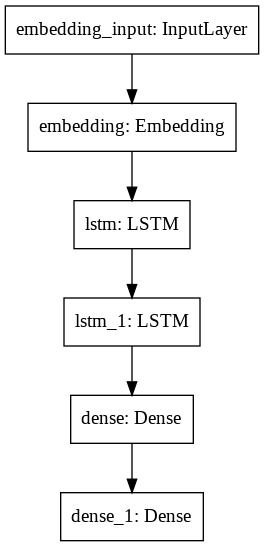

In [ ]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model
keras.utils.plot_model(model,to_file='plot.png',show_layer_names = True)

# **Build the Model**

In [ ]:
saved_model_location = '/content/gdrive/My Drive/ICE477/next_word_text.h5'
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(saved_model_location, monitor='loss',verbose=1,save_best_only=True)

# **Train the Model**

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001))
model.fit(x,y,epochs=70,batch_size= 64,callbacks=[checkpoint])


Epoch 1/70
1015/1015 [==============================] - 42s 33ms/step - loss: 6.7229

Epoch 00001: loss improved from inf to 6.72287, saving model to /content/gdrive/My Drive/ICE477/next_word_text.h5
Epoch 2/70
1015/1015 [==============================] - 34s 34ms/step - loss: 6.2012

Epoch 00002: loss improved from 6.72287 to 6.20122, saving model to /content/gdrive/My Drive/ICE477/next_word_text.h5
Epoch 3/70
1015/1015 [==============================] - 34s 33ms/step - loss: 5.8461

Epoch 00003: loss improved from 6.20122 to 5.84612, saving model to /content/gdrive/My Drive/ICE477/next_word_text.h5
Epoch 4/70
1015/1015 [==============================] - 34s 34ms/step - loss: 5.5705

Epoch 00004: loss improved from 5.84612 to 5.57050, saving model to /content/gdrive/My Drive/ICE477/next_word_text.h5
Epoch 5/70
1015/1015 [==============================] - 34s 34ms/step - loss: 5.3149

Epoch 00005: loss improved from 5.57050 to 5.31485, saving model to /content/gdrive/My Drive/ICE477/ne

# **Predict**

In [ ]:
# Load the model and tokenizer
from tensorflow.keras.models import load_model
import numpy as np
import pickle

model = load_model(saved_model_location)
tokenizer = pickle.load(open(Saved_Token_Path,'rb'))
def Predict_Next_Words(model,tokenizer,text):
  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ''
  for key, value in tokenizer.word_index.items():
    if value == preds:
      predicted_word = key
      break

  print(predicted_word)
  return predicted_word

In [ ]:
while (True):
  text = input('Enter your line')
  if text == '0' :
    print('Thank You for Using........')
    break
  else:
    try:
      text = text.split()
      text = text[-3:]
      print(text)
      Predict_Next_Words(model, tokenizer, text)
    except Exception as e:
      print('Error Occured:',e)
      continue

Enter your linemy father came
['my', 'father', 'came']
we
Enter your lineI got a reply to my
['reply', 'to', 'my']
next
Enter your linereached the Himalayan
['reached', 'the', 'Himalayan']
hill
Enter your linehe simply remarked
['he', 'simply', 'remarked']
very
Enter your lineeven ceased to
['even', 'ceased', 'to']
scold
Enter your line0
Thank You for Using........
